# Read files and match them with their labels. Also, exclude those that have as label UNREADABLE, UNREDABLE, UNRADABLE or EMPTY

/Users/mariachristina/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Files in folder_path:


 1. Image: TRAIN_149190
Label: RECHER

 Image Preview


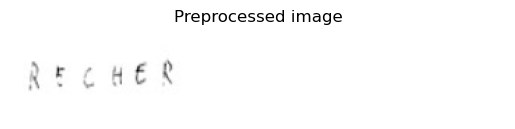



 2. Image: TRAIN_138769
Label: JACQUIER

 Image Preview


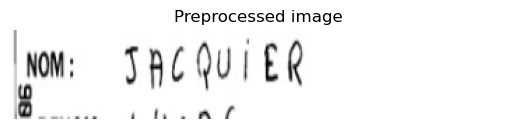



 3. Image: TRAIN_166173
Label: GABRIELIDES

 Image Preview


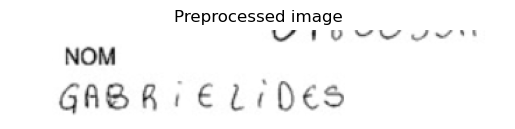

Files in folder_path:


 1. Image: VALIDATION_35091
Label: ELODIE

 Image Preview


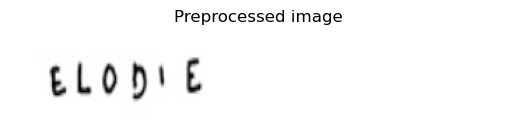



 2. Image: VALIDATION_3744
Label: ARTHUR

 Image Preview


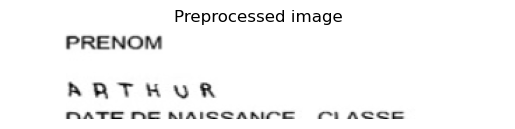



 3. Image: VALIDATION_15341
Label: CHLOE

 Image Preview


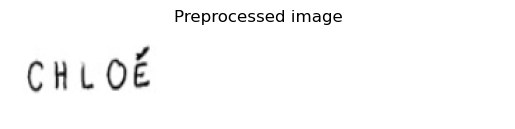

Skipping file 'VALIDATION_25282.jpg' due to unreadable or empty label.
Skipping file 'VALIDATION_27495.jpg' due to unreadable or empty label.
Files in folder_path:


 1. Image: TEST_21753
Label: PERTUISEL

 Image Preview


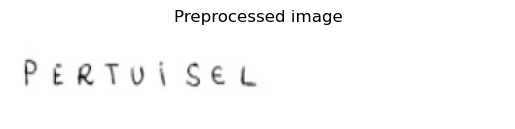



 2. Image: TEST_30886
Label: LEON

 Image Preview


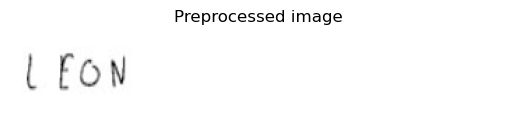



 3. Image: TEST_11690
Label: CARLIER

 Image Preview


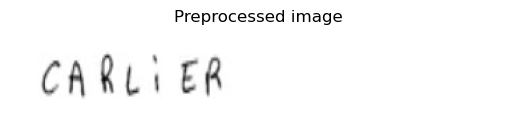

Train images shape: (20, 64, 355)
Train labels shape: (20,)
Validation images shape: (20, 64, 355)
Validation labels shape: (20,)
Test images shape: (20, 64, 355)
Test labels shape: (20,)
Files in folder_path:
Skipping file 'TRAIN_00807.jpg' due to unreadable or empty label.


 1. Image: TRAIN_00026
Label: MARION

 Image Preview


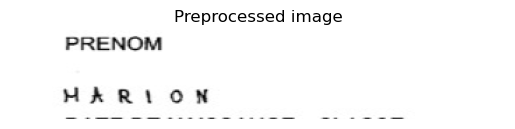



 2. Image: TRAIN_00032
Label: PREVOST

 Image Preview


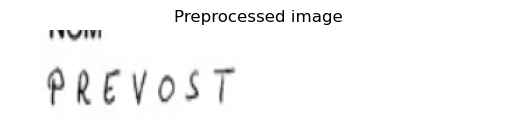



 3. Image: TRAIN_00033
Label: ROMANE

 Image Preview


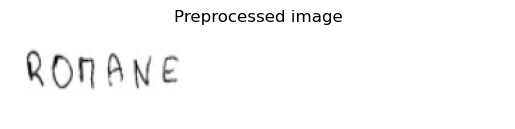

Skipping file 'TRAIN_00951.jpg' due to unreadable or empty label.
Files in folder_path:


 1. Image: VALIDATION_35091
Label: ELODIE

 Image Preview


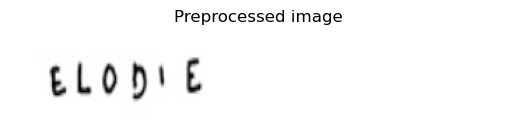



 2. Image: VALIDATION_3744
Label: ARTHUR

 Image Preview


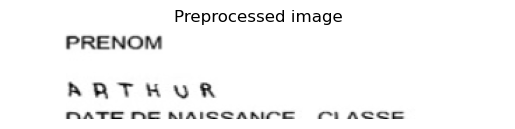



 3. Image: VALIDATION_15341
Label: CHLOE

 Image Preview


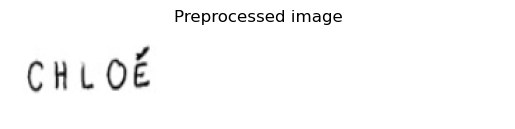

Skipping file 'VALIDATION_25282.jpg' due to unreadable or empty label.
Skipping file 'VALIDATION_27495.jpg' due to unreadable or empty label.
Files in folder_path:


 1. Image: TEST_21753
Label: PERTUISEL

 Image Preview


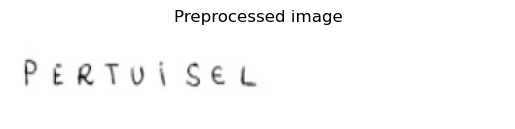



 2. Image: TEST_30886
Label: LEON

 Image Preview


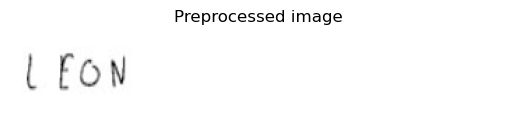



 3. Image: TEST_11690
Label: CARLIER

 Image Preview


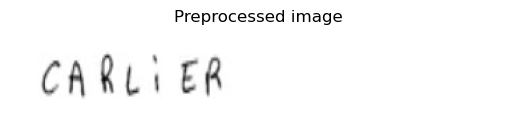

Train images shape: (40, 64, 355)
Train labels shape: (40,)
Validation images shape: (20, 64, 355)
Validation labels shape: (20,)
Test images shape: (20, 64, 355)
Test labels shape: (20,)


In [1]:
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

def read_files(folder_path, csv_path, num_samples=20):
    # Read the CSV file to get labels
    labels_df = pd.read_csv(csv_path)
    
    # Get all files in folder
    file_list = os.listdir(folder_path)
    
    # Dictionary to store images and their labels
    images_dict = {}
    
    # Counter to keep track of the number of images
    image_counter = 0
    
    # Print file names in file_list
    print('\033[1mFiles in folder_path:\033[0m')
    
    for file_name in file_list:
        if image_counter >= num_samples:
            break
        
        # Read the file using the full path
        file_path = os.path.join(folder_path, file_name)
        
        # Read the image in grayscale
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        
        if image is None:
            continue
        
        # Resize image to a standard size
        image_resized = cv2.resize(image, (355, 64))  # Width x Height
        
        # Normalize the image
        image_normalized = image_resized / 255.0
        
        # Get the label for the image
        image_name = os.path.splitext(file_name)[0]
        label = labels_df[labels_df['FILENAME'] == file_name]['IDENTITY'].values[0]
        
        # Check if label is UNREADABLE, UNREDABLE, UNRADABLE, or empty
        if pd.isna(label) or label.strip().upper() in ["UNREADABLE", "UNREDABLE", "UNRADABLE", "EMPTY"]:
            print(f"Skipping file '{file_name}' due to unreadable or empty label.")
            continue
        
        # Store the image and its label in the dictionary
        images_dict[image_name] = {'image': image_normalized, 'label': label}
        
        # Access images and preview the first 3 images
        if image_counter < 3:
            print(f'\n\033[1m\n {image_counter + 1}. Image: {image_name}\033[0m')
            print(f'Label: {label}')
            print('\n\033[1m Image Preview\033[0m')
            plt.imshow(image_normalized, cmap='gray')
            plt.title('Preprocessed image')
            plt.axis('off')
            plt.show()
        
        # Increase counter
        image_counter += 1
        
    return images_dict

def load_data(folder_path, csv_path, num_samples=20):
    return read_files(folder_path, csv_path, num_samples=num_samples)

# Load first 20 samples from training, validation, and test data
train_data = load_data('./Handwriting_Dataset/train_v2/train', './Handwriting_Dataset/written_name_train_v2.csv', num_samples=20)
val_data = load_data('./Handwriting_Dataset/validation_v2/validation', './Handwriting_Dataset/written_name_validation_v2.csv', num_samples=20)
test_data = load_data('./Handwriting_Dataset/test_v2/test', './Handwriting_Dataset/written_name_test_v2.csv', num_samples=20)

# Extract images and labels
train_images = np.array([data['image'] for data in train_data.values()])
train_labels = np.array([data['label'] for data in train_data.values()])

val_images = np.array([data['image'] for data in val_data.values()])
val_labels = np.array([data['label'] for data in val_data.values()])

test_images = np.array([data['image'] for data in test_data.values()])
test_labels = np.array([data['label'] for data in test_data.values()])

# Display shape of loaded data
print(f'Train images shape: {train_images.shape}')
print(f'Train labels shape: {train_labels.shape}')
print(f'Validation images shape: {val_images.shape}')
print(f'Validation labels shape: {val_labels.shape}')
print(f'Test images shape: {test_images.shape}')
print(f'Test labels shape: {test_labels.shape}')

# Additional part to exclude files with unreadable or empty labels
def exclude_unreadable_files(data_dict):
    filtered_data = {}
    for image_name, data in data_dict.items():
        label = data['label']
        if pd.isna(label) or label.strip().upper() in ["UNREADABLE", "UNREDABLE", "UNRADABLE", "EMPTY"]:
            print(f"Excluding file '{image_name}' due to unreadable or empty label.")
        else:
            filtered_data[image_name] = data
    return filtered_data

train_data = exclude_unreadable_files(train_data)
val_data = exclude_unreadable_files(val_data)
test_data = exclude_unreadable_files(test_data)


def load_data(folder_path, csv_path, num_samples=20):
    return read_files(folder_path, csv_path, num_samples=num_samples)

# Load first 20 samples from training, validation, and test data
train_data = load_data('./Handwriting_Dataset/train_v2/train_custom', './Handwriting_Dataset/written_name_train_v2.csv', num_samples=42)
val_data = load_data('./Handwriting_Dataset/validation_v2/validation', './Handwriting_Dataset/written_name_validation_v2.csv', num_samples=20)
test_data = load_data('./Handwriting_Dataset/test_v2/test', './Handwriting_Dataset/written_name_test_v2.csv', num_samples=20)

# Extract images and labels
train_images = np.array([data['image'] for data in train_data.values()])
train_labels = np.array([data['label'] for data in train_data.values()])

val_images = np.array([data['image'] for data in val_data.values()])
val_labels = np.array([data['label'] for data in val_data.values()])

test_images = np.array([data['image'] for data in test_data.values()])
test_labels = np.array([data['label'] for data in test_data.values()])

# Display shape of loaded data
print(f'Train images shape: {train_images.shape}')
print(f'Train labels shape: {train_labels.shape}')
print(f'Validation images shape: {val_images.shape}')
print(f'Validation labels shape: {val_labels.shape}')
print(f'Test images shape: {test_images.shape}')
print(f'Test labels shape: {test_labels.shape}')